In [686]:
from sympy import *

# 1  WRONG

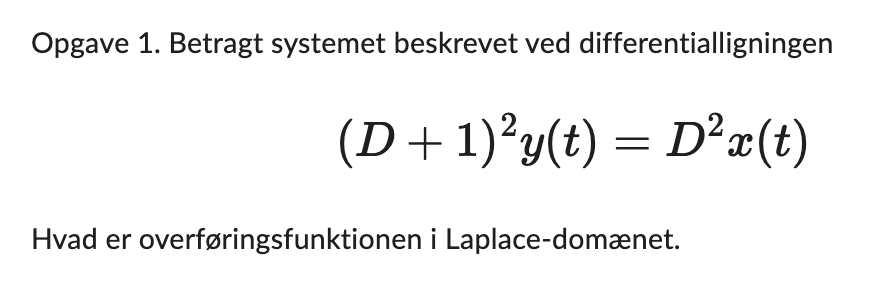

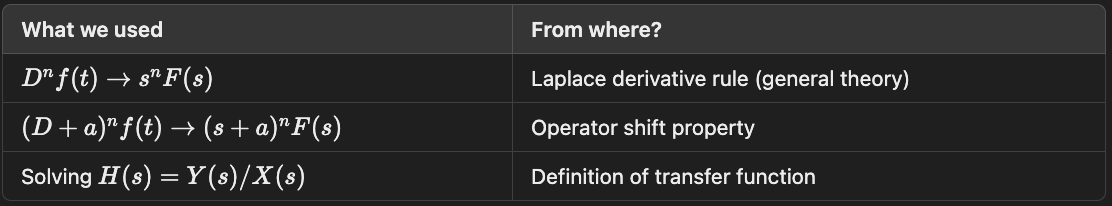

In [687]:
X, Y = symbols('X Y')

def D_to_laplace(expr, func_symbol):
    """
    Convert expression involving D operators to Laplace domain.
    E.g. (D + 1)**2 * y(t) -> (s + 1)**2 * Y
    """
    D = symbols('D')
    expr_laplace = expr.replace(
        lambda e: e.has(D),
        lambda e: e.subs(D, s)
    ).replace(func_symbol, Y if func_symbol == y else X)
    return expr_laplace

In [688]:
# Example differential equation:
# (D + 1)**2 * y(t) = D**2 * x(t)

# Step 1: Define symbols and operator
D = symbols('D')
x, y = symbols('x y', cls=Function)
t = symbols('t')

# Define the equation
lhs = (D + 1)**2 * y(t)
rhs = D**2 * x(t)
eq = Eq(lhs, rhs)

# Step 2: Convert to Laplace domain
lhs_lap = D_to_laplace(lhs, y(t))
rhs_lap = D_to_laplace(rhs, x(t))

# Step 3: Solve for transfer function H(s) = Y(s)/X(s)
Hs = simplify(lhs_lap / rhs_lap)
display(Hs)

Hs = simplify(Y / X / Hs)  # Since lhs_lap = rhs_lap => Y/X = rhs_lap / lhs_lap
display(Hs)
(Hs.simplify() ) # Simplify and divide by s**2

(s + 1)**2/s**2

Y*s**2/(X*(s + 1)**2)

Y*s**2/(X*(s + 1)**2)

this is incorrect

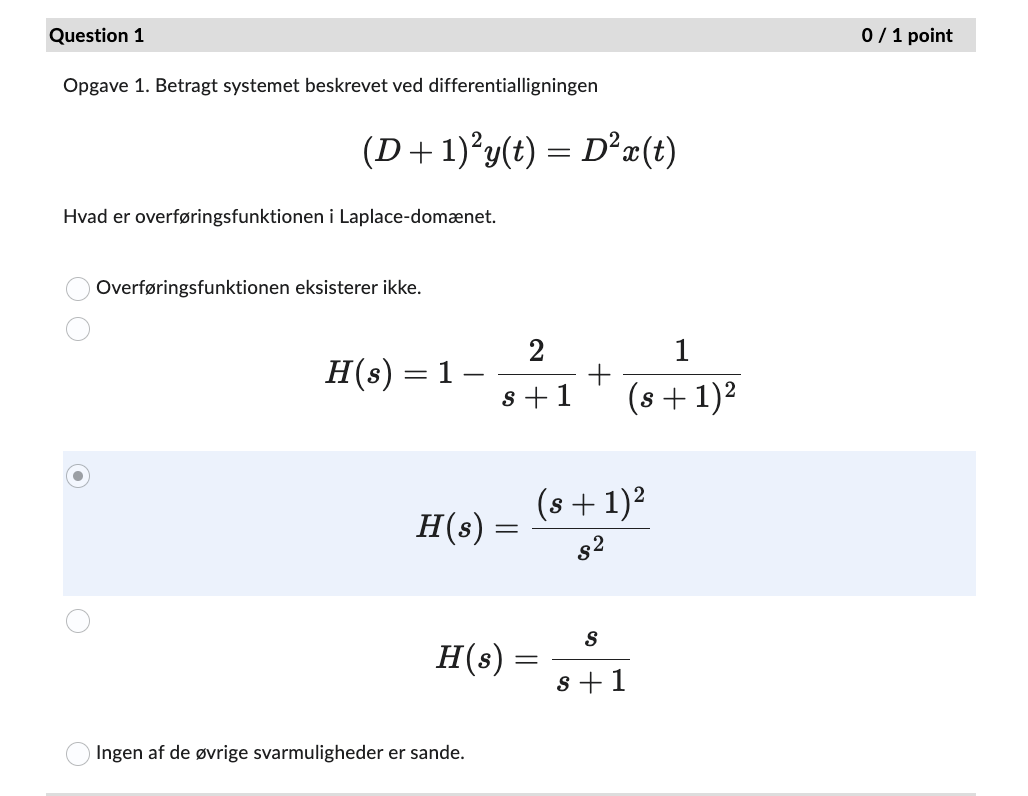

# 2

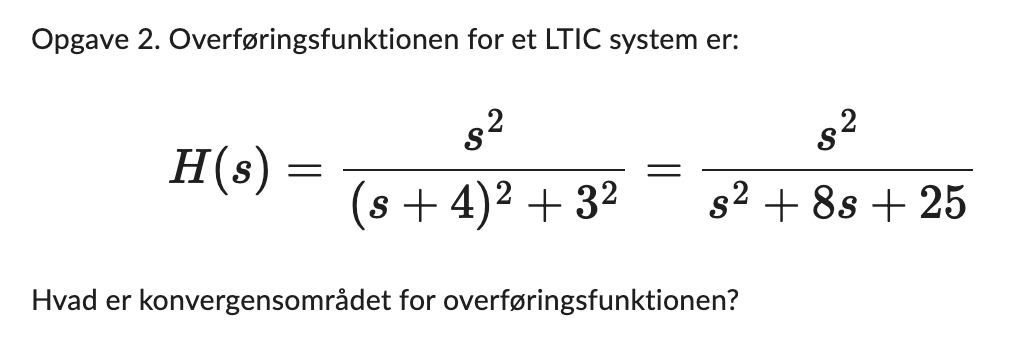

In [689]:
t = symbols('t', real=True, positive=True)
w0, s = symbols('w0 s')

Hs = s**2 / (s**2 +8*s + 25)
H_list = [Hs]

def poles_zeros(H_list):
    zero_list = []
    pole_list = []
    denom_list = []

    for H_s in H_list:
        if isinstance(H_s, Piecewise):
            H_s = H_s.args[0][0]  # Extract the first expression (valid for ROC)
            display(H_s)

        H_s = H_s.together()
        num, denom = H_s.as_numer_denom()
        denom_list.append(denom)

        print(f"Numerator: {num}")
        print(f"Denominator: {denom}")

        # Extract poles and zeros
        zeros = solve(num, s)
        poles = solve(denom, s)

        zero_list.append(zeros)
        pole_list.append(poles)

    display(zero_list) 
    display(pole_list)
    display(denom_list)

poles_zeros(H_list)

Numerator: s**2
Denominator: s**2 + 8*s + 25


[[0]]

[[-4 - 3*I, -4 + 3*I]]

[s**2 + 8*s + 25]

In [690]:
# same as just finding the poles in principle
for denom in denom_list:
    sol = solve((Eq(denom, 0)), s)
    display(sol)

# ROC = the real part of s ==> Re(s) > -4

[-4 - 3*I, -4 + 3*I]

# 3

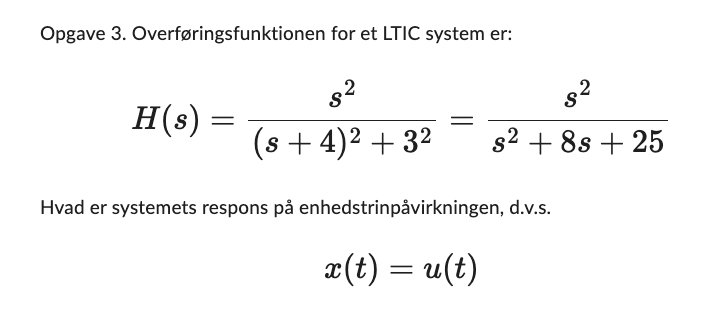

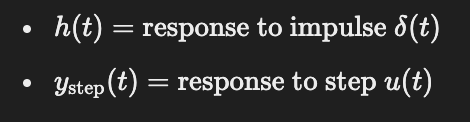

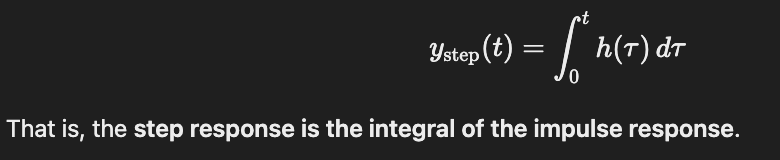

In [691]:
Hs = s**2 / (s**2 +8*s + 25)

# Step response = H(s) * 1/s (unit step input)
Ystep_s = Hs / s

# Inverse Laplace Transform to get y_step(t)
ystep_t = inverse_laplace_transform(Ystep_s, s, t)
ystep_t = simplify(ystep_t)

display(ystep_t) # times u(t) (implicit)

(-4*sin(3*t)/3 + cos(3*t))*exp(-4*t)

# 4

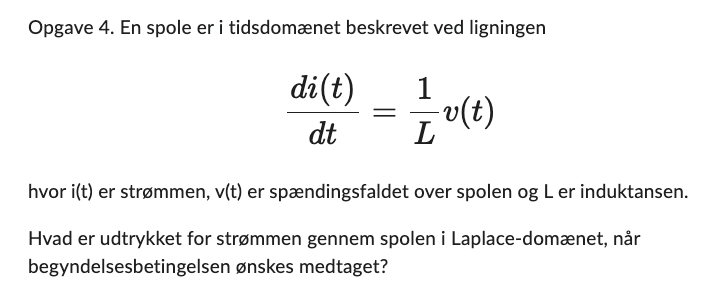

In [692]:
# gives the current through the inductor in the laplace domain, given a time domain equation
def laplace_solve_current(eq, func_name='i', laplace_var='s', time_var='t'):
    # Setup symbols and functions
    t = symbols(time_var, real=True)
    s = symbols(laplace_var)
    f = Function(func_name)(t)

    # Extract RHS from equation
    rhs = eq.rhs

    # Assume eq is first-order like df/dt = rhs
    f_laplace = Function(func_name.capitalize())(s)
    f0 = symbols(f"{func_name}0", real=True)  # e.g., i0 for i(0-)

    # Laplace transform of both sides
    lhs_laplace = s * f_laplace - f0
    rhs_laplace = laplace_transform(rhs, t, s, noconds=True)

    # Solve for F(s)
    lap_eq = Eq(lhs_laplace, rhs_laplace)
    sol = solve(lap_eq, f_laplace)[0]

    return simplify(sol)

In [693]:
L = symbols('L', positive=True)
v = Function('v')(t)
i = Function('i')(t)

# Define equation: di/dt = v / L
eq = Eq(Derivative(i, t), v / L)

# Call the function
laplace_expr = laplace_solve_current(eq, func_name='i')
laplace_expr # I(s)

i0/s + v(t)/(L*s**2)

The initial current i(0−) becomes part of the solution.

# 5

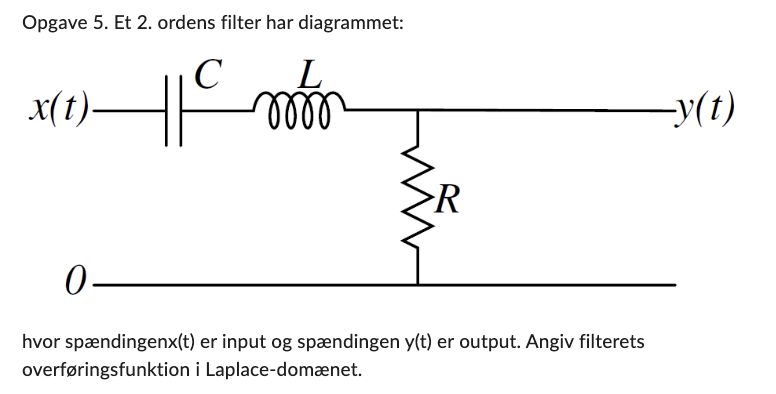

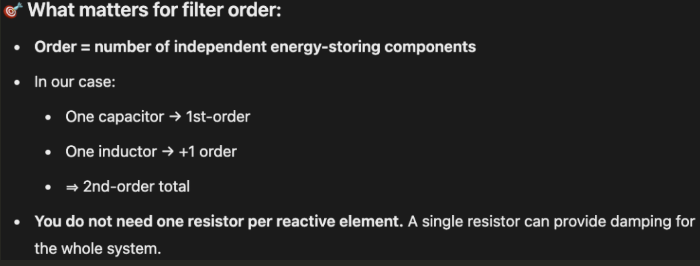

In [694]:
s, R, L, C = symbols('s R L C', real=True, positive=True)

# Impedances in Laplace domain
Z_C = 1 / (C * s)
Z_L = L * s
Z_R = R

# Total impedance before output node (Z1 = Z_C + Z_L)
Z1 = Z_C + Z_L

# Impedance across which output is measured (Z2 = R)
Z2 = Z_R

# Apply voltage divider formula: H(s) = Z2 / (Z1 + Z2)
H_s = Z2 / (Z1 + Z2)

# Simplify transfer function
H_s_simplified = simplify(H_s)
display(H_s_simplified.expand()) # H(s) 

C*R*s/(C*L*s**2 + C*R*s + 1)

# 6

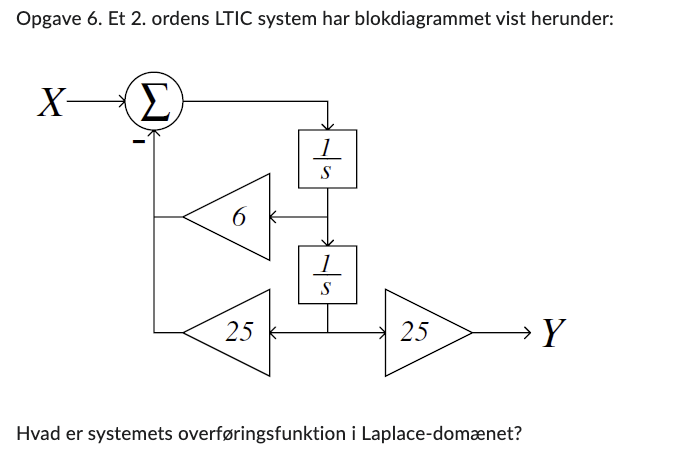

triangles = amplification

In [695]:
s = symbols('s')

# Define Laplace transforms of signals
X = Function('X')(s)
V = Function('V')(s)

# Internal relations based on the diagram
W = V / s
Y = W / s
Y_final = 25 * Y  # final output after gain block

# Feedback loop equation at summing junction:
# V = X - 6*W - 25*Y
eq = Eq(V, X - 6*W - 25*Y)

# Solve for V in terms of X
V_expr = solve(eq, V)[0]

# Substitute into Y_final
Y_expr = simplify(25 * (V_expr / s**2))

# Compute transfer function H(s) = Y(s)/X(s)
H = simplify(Y_expr / X)
display(H)

25/(s**2 + 6*s + 25)

# 7

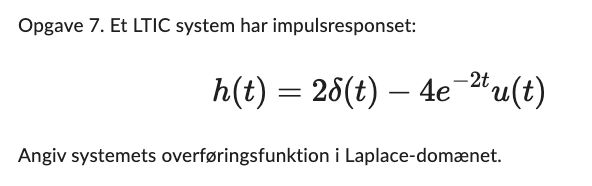

In [696]:
t, s = symbols('t s')

# Define h(t)
h = 2*DiracDelta(t) - 4*exp(-2*t)*Heaviside(t)

# Take Laplace transform of h(t)
H = LaplaceTransform(h, t, s)

H_simplified = simplify(H)
display(H_simplified)
display(H_simplified.factor())

2 - 4/(s + 2)

2*s/(s + 2)

# 8

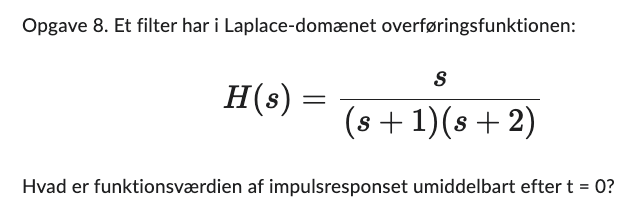

In [697]:
t, s = symbols("t s")

H = s / ((s + 1) * (s + 2))

# Inverse Laplace transform to get h(t)
h = inverse_laplace_transform(H, s, t)

# Simplify the expression
h = simplify(h)
display(h)

##### rewrite() didn't work #######
# h_rewrite = h.rewrite(Heaviside, lambda x: 1)
# display(h_rewrite)

# # Evaluate h(t) at t = 0+
# h_at_0_plus = h_rewrite.subs(t, 0)

# display(h)  # h(t)
# display(h_at_0_plus)  # h(0+)
###################################

h_at_0_plus = h.subs({t: 0, Heaviside(t): 1})
display(h_at_0_plus)

(2 - exp(t))*exp(-2*t)*Heaviside(t)

1

### exampleusage of rewrite() (not part of the solution)

In [698]:
# help(h.rewrite)

x = symbols('x')
expr = sin(x)**2 + cos(x)**2
display(expr)

# Rewrite in terms of exp using Euler's formula
expr_exp = expr.rewrite(exp)
display(expr_exp)  # Will give you an expression using exp() instead of sin/cos

sin(x)**2 + cos(x)**2

(exp(I*x)/2 + exp(-I*x)/2)**2 - (exp(I*x) - exp(-I*x))**2/4

SymPy has a large library of known mathematical identities, and .rewrite() 

lets you trigger a transformation by saying what kind of expression you want it rewritten in terms of.